# Term Project
# Understanding the Dataset

In [10]:
import pandas as pd
import numpy as np
import sklearn as sk
from pylab import *
import matplotlib.pyplot as pt
%matplotlib inline
import seaborn as sns

#Displays every line from the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
credit_data = pd.read_csv('german_credit_card.csv')
credit_card_data = credit_data.copy()

In [12]:
credit_card_data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [13]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    10

### As we can see there is no missing data and all the data vlaues in each column are all integers.
and from this dataframe and reading the data description Creditability is the dependent variable.

In [14]:
# This shows all the mean, std, min, and max of each column
credit_card_data.describe() # this is missing the column details for Guarantors
credit_card_data['Guarantors'].describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


count    1000.000000
mean        1.145000
std         0.477706
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Guarantors, dtype: float64

## From the cell above
The dependent variable that we will be solving for is Creditability
As we can see in the cell above Creditability has a mean of 70%
Since Creditability is only 0 and 1 where 1 means good credit and 0 means bad credit it is qualitative.
70% of the people from the dataset have good credit.
We will need to randomize the data when choosing test and validation set since the data set is in order (all good credits first in the list)

# Looking at each individual column
## Account Balance

{'boxes': [<matplotlib.lines.Line2D at 0x1a15543208>],
 'caps': [<matplotlib.lines.Line2D at 0x1a15543c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1554c8d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1554c4a8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a15543358>,
  <matplotlib.lines.Line2D at 0x1a155437f0>]}

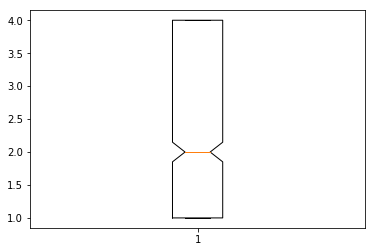

In [15]:
matplotlib.pyplot.boxplot(credit_card_data['Account Balance'], notch=True)
# Looking this plot it shows that the median is 2 and that there are no outliers.

In [16]:
# Account balance  mean is 2.577
print(credit_card_data['Account Balance'].median())
# 2 is the most common so the account balance for most of the people in the dataset is between 0 (inclusive) and 200 (exclusive)

credit_card_data.groupby(['Account Balance'])[['Account Balance']].count()
# This means that 394 people do not have a checking account


2.0


394

,Account Balance
Account Balance,
1,274
2,269
3,63
4,394


,Creditability
Account Balance,
1,0.507299
2,0.609665
3,0.777778
4,0.883249


Text(0,0.5,'rate')

Text(0.5,1,'Account Balance and Creditability')

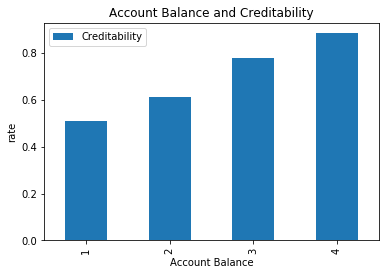

In [17]:
acct_plot = credit_card_data.pivot_table(index='Account Balance', values='Creditability')
acct_grp = credit_card_data.groupby(['Account Balance'])[['Creditability']]
acct_grp.mean()
acct_plot.plot.bar()
plt.ylabel('rate')
plt.title('Account Balance and Creditability')
plt.show()

# This shows that people with not checking account have the highest creditability rate

## Duration of Credit

{'boxes': [<matplotlib.lines.Line2D at 0x1a15460358>],
 'caps': [<matplotlib.lines.Line2D at 0x1a15460d68>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a15471a20>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a154715f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a154604a8>,
  <matplotlib.lines.Line2D at 0x1a15460940>]}

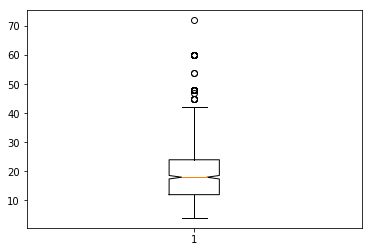

In [26]:
# Scatter plot to see if there are any outliers
matplotlib.pyplot.boxplot(credit_card_data['Duration of Credit (month)'], notch=True)

#This shows that this column contains outliers duration is more than 45 months.

In [27]:
credit_card_data['Duration of Credit (month)'].median()
# a year and a half is the most common lenght of credit and mean is 20


18.0

Text(0,0.5,'rate')

Text(0.5,1,'Duration and Creditability')

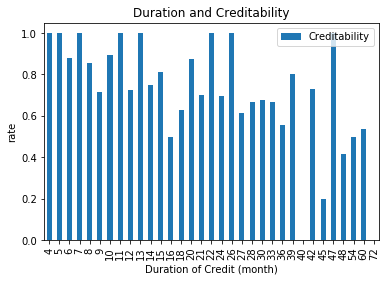

Creditability    0.708859
dtype: float64


                             Creditability
Duration of Credit (month)               
4                                1.000000
5                                1.000000
6                                0.880000
7                                1.000000
8                                0.857143
9                                0.714286
10                               0.892857
11                               1.000000
12                               0.726257
13                               1.000000
14                               0.750000
15                               0.812500
16                               0.500000
18                               0.628319
20                               0.875000
21                               0.700000
22                               1.000000
24                               0.695652
26                               1.000000
27                               0.615385
28                               0.666667
30                              

In [28]:
duration_plot = credit_card_data.pivot_table(index='Duration of Credit (month)', values='Creditability')
duration_plot.plot.bar()
plt.ylabel('rate')
plt.title('Duration and Creditability')
plt.show()
duration_plot.mean()
duration_grp = credit_card_data.groupby(['Duration of Credit (month)'])[['Creditability']]
print("\n",duration_grp.mean())

In [23]:
# bin the durations into groups to interpret the creditability between durations groups, if there is one
bins = [0,15,30,45,75]
binned_grp = pd.cut(credit_card_data['Duration of Credit (month)'], bins, labels=[1,2,3,4])
binned_accepted = pd.cut(credit_card_data[credit_card_data['Creditability']==1]['Duration of Credit (month)'], bins)
credit_card_data['Credit Duration'] = binned_grp
# print('binned accepted\n',binned_accepted)
credit_card_data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Credit Duration
0,1,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,1,1,1,2
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,2,1,1,1
2,1,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,1,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,2,1,2,1
4,1,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,1,1,2,1


Text(0,0.5,'rate')

Text(0.5,1,'Creditability based on Duration')

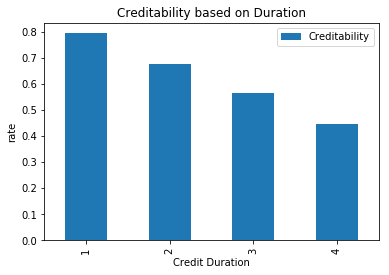

Creditability    0.62031
dtype: float64

In [24]:
duration_plot = credit_card_data.pivot_table(index='Credit Duration', values="Creditability")
duration_plot.plot.bar()
plt.ylabel('rate')
plt.title('Creditability based on Duration')
plt.show()


duration_plot.mean()


In [31]:
print("Number of customers in the credit duration")
credit_card_data.groupby(['Credit Duration'])[['Credit Duration']].count()

print("\nThe creditability rate:")
accept_grp = credit_card_data.groupby(['Credit Duration'])[['Creditability']]
accept_grp.mean()

# this shows that cutomers with in the first group with duration from 0 to 15
# has the largest number of customers in its group and it has the highest creditability rating 

Number of customers in the credit duration


,Credit Duration
Credit Duration,
1,431
2,396
3,108
4,65



The creditability rate:


,Creditability
Credit Duration,
1,0.793503
2,0.676768
3,0.564815
4,0.446154


## Payment Status of Previous Credit

Text(0,0.5,'rate')

Text(0.5,1,'Payment and Creditability')

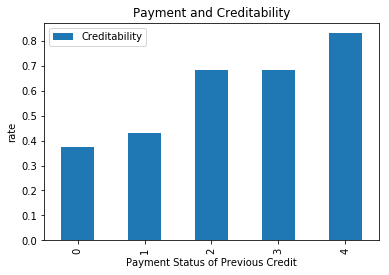


mean Creditability    0.599175
dtype: float64
median 2.0
The number of cutomers in each payment status


,Payment Status of Previous Credit
Payment Status of Previous Credit,
0,40
1,49
2,530
3,88
4,293



                                    Creditability
Payment Status of Previous Credit               
0                                       0.375000
1                                       0.428571
2                                       0.681132
3                                       0.681818
4                                       0.829352


In [36]:
payment_plot = credit_card_data.pivot_table(index='Payment Status of Previous Credit', values='Creditability')
payment_plot.plot.bar()
plt.ylabel('rate')
plt.title('Payment and Creditability')
plt.show()
print()
print('mean',payment_plot.mean())
print('median',credit_card_data['Payment Status of Previous Credit'].median())

print("The number of cutomers in each payment status")
credit_card_data.groupby(['Payment Status of Previous Credit'])[['Payment Status of Previous Credit']].count()


payment_grp = credit_card_data.groupby(['Payment Status of Previous Credit'])[['Creditability']]
print("\n",payment_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x151dc0dac8>],
 'caps': [<matplotlib.lines.Line2D at 0x151dc17518>,
 'fliers': [<matplotlib.lines.Line2D at 0x151db661d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151dc17d68>],
 'whiskers': [<matplotlib.lines.Line2D at 0x151dc0dc18>,
  <matplotlib.lines.Line2D at 0x151dc170f0>]}

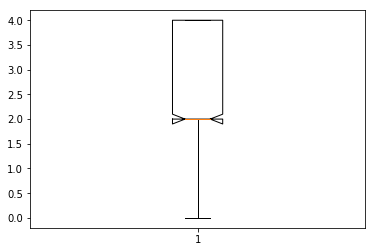

In [18]:
matplotlib.pyplot.boxplot(credit_card_data['Payment Status of Previous Credit'], notch=True)

In [37]:
# this shows that customers that have a critical account have the highest creditability rating
# and that this column does not contain any outliers

## Purpose

Text(0,0.5,'rate')

Text(0.5,1,'Purpose and Creditability')

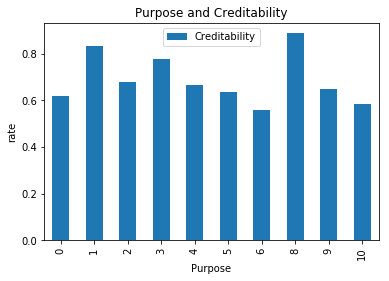

Creditability    0.689748
dtype: float64


The number of cutomers in each purpose group


,Purpose
Purpose,
0,234
1,103
2,181
3,280
4,12
5,22
6,50
8,9
9,97




          Creditability
Purpose               
0             0.619658
1             0.834951
2             0.679558
3             0.778571
4             0.666667
5             0.636364
6             0.560000
8             0.888889
9             0.649485
10            0.583333


In [38]:
purpose_plot = credit_card_data.pivot_table(index='Purpose', values='Creditability')
purpose_plot.plot.bar()
plt.ylabel('rate')
plt.title('Purpose and Creditability')
plt.show()

purpose_plot.mean()

print()
print("The number of cutomers in each purpose group")
credit_card_data.groupby(['Purpose'])[['Purpose']].count()
print()
purpose_grp = credit_card_data.groupby(['Purpose'])[['Creditability']]
print("\n",purpose_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x151ddb54e0>],
 'caps': [<matplotlib.lines.Line2D at 0x151ddb5ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x151ddbfba8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151ddbf780>],
 'whiskers': [<matplotlib.lines.Line2D at 0x151ddb5630>,
  <matplotlib.lines.Line2D at 0x151ddb5ac8>]}

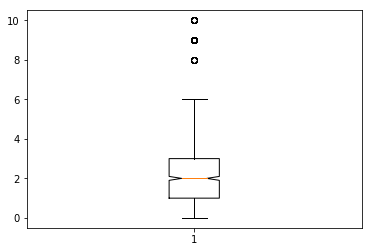

In [20]:
matplotlib.pyplot.boxplot(credit_card_data['Purpose'], notch=True)

In [39]:
# This shows that there are outliers 8,9,10 looking at the creditability rating 8 has the higest rate,
# however it is an outlier and doesn't truly represent the Retraining well. 
# Hence group 1 (Used cars) and 3(Radio/Television) have a better idea for high rating with 83% and 77% respectfully.

## Credit Amount

In [40]:
cr_amt_plot = credit_card_data.pivot_table(index='Credit Amount', values='Creditability')

cr_amt_plot.mean()
cr_amt_grp = credit_card_data.groupby(['Credit Amount'])[['Creditability']]
print("\n",cr_amt_grp.mean())

Creditability    0.697003
dtype: float64


                Creditability
Credit Amount               
250                      1.0
276                      1.0
338                      1.0
339                      1.0
343                      1.0
362                      1.0
368                      1.0
385                      1.0
392                      1.0
409                      1.0
426                      1.0
428                      1.0
433                      0.0
448                      0.0
454                      1.0
458                      1.0
484                      1.0
518                      1.0
522                      1.0
571                      1.0
585                      1.0
590                      1.0
601                      1.0
609                      0.5
618                      1.0
625                      1.0
626                      0.0
629                      1.0
639                      0.0
640                      1.0
...                      ...
10974                    0.0
11054       

{'boxes': [<matplotlib.lines.Line2D at 0x1a153bed30>],
 'caps': [<matplotlib.lines.Line2D at 0x1a153d3780>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a153de438>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a153d3fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a153bee80>,
  <matplotlib.lines.Line2D at 0x1a153d3358>]}

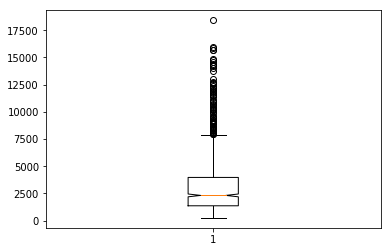

In [41]:
matplotlib.pyplot.boxplot(credit_card_data['Credit Amount'], notch=True)

In [42]:
cr_amt_bins = [200,2200,4200,6200,8200,10200,12200,14200,18500]
cr_amt_grp = pd.cut(credit_card_data['Credit Amount'], cr_amt_bins, labels=[1,2,3,4,5,6,7,8])
cr_amt_accepted = pd.cut(credit_card_data[credit_card_data['Creditability']==1]['Credit Amount'], cr_amt_bins, labels=[1,2,3,4,5,6,7,8])
credit_card_data['Credit Amount Grp'] = cr_amt_grp
credit_card_data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Credit Duration,Credit Amount Grp
0,1,1,18,4,2,1049,1,2,4,2,...,21,3,1,1,3,1,1,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,36,3,1,2,3,2,1,1,1,2
2,1,2,12,2,9,841,2,4,2,2,...,23,3,1,1,2,1,1,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,39,3,1,2,2,2,1,2,1,1
4,1,1,12,4,0,2171,1,3,4,3,...,38,1,2,2,2,1,1,2,1,1


Text(0,0.5,'rate')

Text(0.5,1,'Creditability based on Credit Amount')

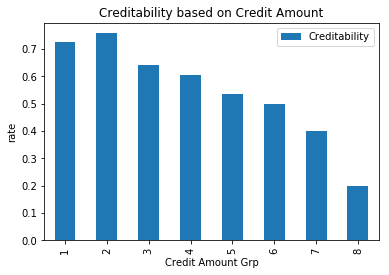

In [43]:
cr_amt_plot = credit_card_data.pivot_table(index='Credit Amount Grp', values="Creditability")
cr_amt_plot.plot.bar()
plt.ylabel('rate')
plt.title('Creditability based on Credit Amount')
plt.show()




In [44]:
print("The number of cutomers in each Credit Amount Grp")
credit_card_data.groupby(['Credit Amount Grp'])[['Credit Amount Grp']].count()
print()
cr_amt_grpby = credit_card_data.groupby(['Credit Amount Grp'])[['Creditability']]
cr_amt_grpby.mean()

The number of cutomers in each Credit Amount Grp


,Credit Amount Grp
Credit Amount Grp,
1,473
2,293
3,92
4,76
5,28
6,18
7,10
8,10


,Creditability
Credit Amount Grp,
1,0.725159
2,0.757679
3,0.641304
4,0.605263
5,0.535714
6,0.500000
7,0.400000
8,0.200000


In [45]:
# this shows that group 2 that holds credit amount from 2200 to 4200 has the highest creditability rate of 75.8%

## Value Savings/Stocks

Text(0,0.5,'rate')

Text(0.5,1,'Value Savings/Stocks and Creditability')

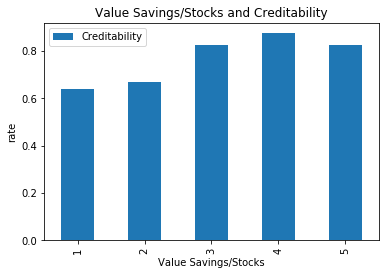

Creditability    0.689748
dtype: float64


The number of cutomers in each Value Savings/Stocks group


,Value Savings/Stocks
Value Savings/Stocks,
1,603
2,103
3,63
4,48
5,183




                       Creditability
Value Savings/Stocks               
1                          0.640133
2                          0.669903
3                          0.825397
4                          0.875000
5                          0.825137


In [47]:
sav_plot = credit_card_data.pivot_table(index='Value Savings/Stocks', values='Creditability')
sav_plot.plot.bar()
plt.ylabel('rate')
plt.title('Value Savings/Stocks and Creditability')
plt.show()

purpose_plot.mean()
print()

print("The number of cutomers in each Value Savings/Stocks group")
credit_card_data.groupby(['Value Savings/Stocks'])[['Value Savings/Stocks']].count()
print()

sav_grp = credit_card_data.groupby(['Value Savings/Stocks'])[['Creditability']]
print("\n",sav_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x151da6d588>],
 'caps': [<matplotlib.lines.Line2D at 0x151da6deb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x151daa1da0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151daa12e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x151da6de80>,
  <matplotlib.lines.Line2D at 0x151da6d128>]}

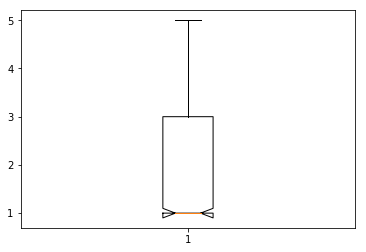

In [27]:
matplotlib.pyplot.boxplot(credit_card_data['Value Savings/Stocks'], notch=True)

In [ ]:
# This shows that there are not outliers to skew the rates and customersin group 4 has the highest rate,
# but also has the lowest number of customer to get the data from.
# a better understanding of this data would be customers that have
# a either no saving account or a saving account above 500DM have the highest probability of getting credit

## Length of current employment

Text(0,0.5,'rate')

Text(0.5,1,'Length of current employment and Creditability')

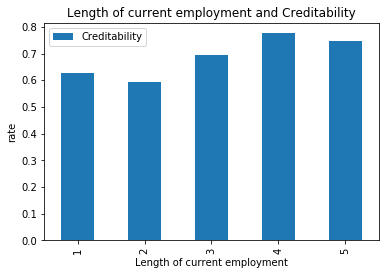

Creditability    0.687634
dtype: float64


The number of cutomers in each Length of current employment group


,Length of current employment
Length of current employment,
1,62
2,172
3,339
4,174
5,253




                               Creditability
Length of current employment               
1                                  0.629032
2                                  0.593023
3                                  0.693215
4                                  0.775862
5                                  0.747036


In [48]:
cur_emp_plot = credit_card_data.pivot_table(index='Length of current employment', values='Creditability')
cur_emp_plot.plot.bar()
plt.ylabel('rate')
plt.title('Length of current employment and Creditability')
plt.show()

cur_emp_plot.mean()

print()

print("The number of cutomers in each Length of current employment group")
credit_card_data.groupby(['Length of current employment'])[['Length of current employment']].count()
print()

cur_emp_grp = credit_card_data.groupby(['Length of current employment'])[['Creditability']]
print("\n",cur_emp_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x151d7f65f8>],
 'caps': [<matplotlib.lines.Line2D at 0x151d8001d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x151d800b38>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151d800a58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x151d7f6898>,
  <matplotlib.lines.Line2D at 0x151d7f6c88>]}

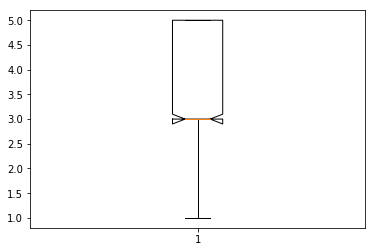

In [29]:
matplotlib.pyplot.boxplot(credit_card_data['Length of current employment'], notch=True)

In [49]:
# This shows that there are not outliers
# and cusomters that have their current job for 4-7years have the highest creditability rating

## Instalment percent

Text(0,0.5,'rate')

Text(0.5,1,'Instalment percent and Creditability')

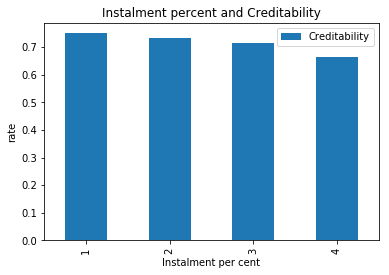

Creditability    0.715236
dtype: float64


The number of cutomers in each Instalment percent group


,Instalment per cent
Instalment per cent,
1,136
2,231
3,157
4,476




                      Creditability
Instalment per cent               
1                         0.750000
2                         0.731602
3                         0.713376
4                         0.665966


In [52]:
instalment_plot = credit_card_data.pivot_table(index='Instalment per cent', values='Creditability')
instalment_plot.plot.bar()
plt.ylabel('rate')
plt.title('Instalment percent and Creditability')
plt.show()

instalment_plot.mean()

print()
print("The number of cutomers in each Instalment percent group")
credit_card_data.groupby(['Instalment per cent'])[['Instalment per cent']].count()
print()

instalment_grp = credit_card_data.groupby(['Instalment per cent'])[['Creditability']]
print("\n",instalment_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x151d7f4f98>],
 'caps': [<matplotlib.lines.Line2D at 0x151d7fc9e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x151d7d56a0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151d7d5278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x151d7fc128>,
  <matplotlib.lines.Line2D at 0x151d7fc5c0>]}

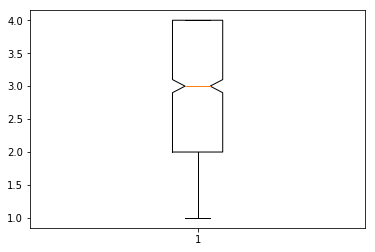

In [31]:
matplotlib.pyplot.boxplot(credit_card_data['Instalment per cent'], notch=True)

In [54]:
# there are no outliers and that all the creditabilty rating are all very similar
# slowing increasing the rate and the installment precent goes down.
# This doesn't give much intell or to be useful in the regression models
# since all the rates are similar and they are all around the rate the creditability is normally

## Sex & Marital Status

Text(0,0.5,'rate')

Text(0.5,1,'Sex & Marital Status and Creditability')

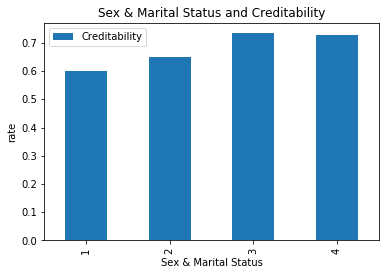

Creditability    0.677556
dtype: float64


The number of cutomers in each Sex & Marital Status group


,Sex & Marital Status
Sex & Marital Status,
1,50
2,310
3,548
4,92




                       Creditability
Sex & Marital Status               
1                          0.600000
2                          0.648387
3                          0.733577
4                          0.728261


In [55]:
status_plot = credit_card_data.pivot_table(index='Sex & Marital Status', values='Creditability')
status_plot.plot.bar()
plt.ylabel('rate')
plt.title('Sex & Marital Status and Creditability')
plt.show()

status_plot.mean()

print()
print("The number of cutomers in each Sex & Marital Status group")
credit_card_data.groupby(['Sex & Marital Status'])[['Sex & Marital Status']].count()
print()

status_grp = credit_card_data.groupby(['Sex & Marital Status'])[['Creditability']]
print("\n",status_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x151e31b0b8>],
 'caps': [<matplotlib.lines.Line2D at 0x151e31bac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x151e323780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151e323358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x151e31b208>,
  <matplotlib.lines.Line2D at 0x151e31b6a0>]}

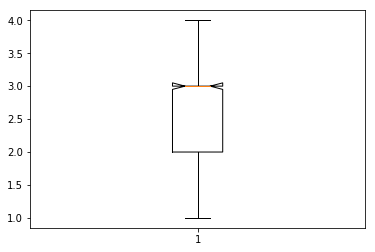

In [33]:
matplotlib.pyplot.boxplot(credit_card_data['Sex & Marital Status'], notch=True)

In [56]:
# No outliers and single males has the highest creditability rating while divorced men have the lowest rating 

## Guarantors

Text(0,0.5,'rate')

Text(0.5,1,'Guarantors and Creditability')

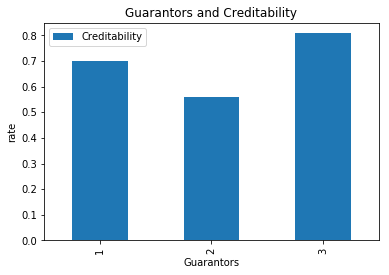

Creditability    0.689593
dtype: float64


The number of cutomers in each Guarantors group


,Guarantors
Guarantors,
1,907
2,41
3,52




             Creditability
Guarantors               
1                0.700110
2                0.560976
3                0.807692


In [57]:
guarantors_plot = credit_card_data.pivot_table(index='Guarantors', values='Creditability')
guarantors_plot.plot.bar()
plt.ylabel('rate')
plt.title('Guarantors and Creditability')
plt.show()

guarantors_plot.mean()

print()
print("The number of cutomers in each Guarantors group")
credit_card_data.groupby(['Guarantors'])[['Guarantors']].count()
print()

guarantors_grp = credit_card_data.groupby(['Guarantors'])[['Creditability']]
print("\n",guarantors_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x151e51fa90>],
 'caps': [<matplotlib.lines.Line2D at 0x151e5294e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x151e531198>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151e529d30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x151e51fbe0>,
  <matplotlib.lines.Line2D at 0x151e5290b8>]}

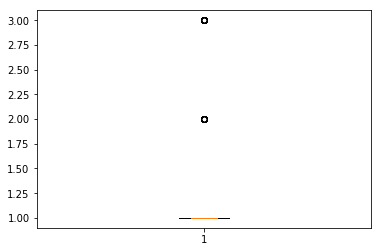

In [35]:
matplotlib.pyplot.boxplot(credit_card_data['Guarantors'], notch=True)

In [58]:
# this shows that cusotmers outside of the first group (no guarantors and co-applicant) are outliers. 
# so looking at the rating is not the best way to determine the creditability for the regression model.
# most customers fall under group one and that their creditabilty rating is 70%
# which is just the creditabilty rating in general.

## Duration in Current address

Text(0,0.5,'rate')

Text(0.5,1,'Duration in Current address and Creditability')

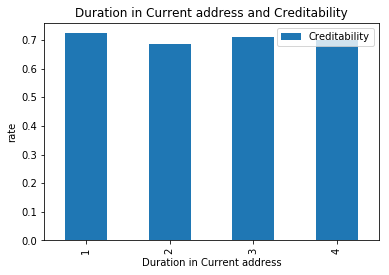

Creditability    0.704827
dtype: float64


The number of cutomers in each Duration in Current address group


,Duration in Current address
Duration in Current address,
1,130
2,308
3,149
4,413




                              Creditability
Duration in Current address               
1                                 0.723077
2                                 0.685065
3                                 0.711409
4                                 0.699758


In [59]:
address_plot = credit_card_data.pivot_table(index='Duration in Current address', values='Creditability')
address_plot.plot.bar()
plt.ylabel('rate')
plt.title('Duration in Current address and Creditability')
plt.show()

address_plot.mean()

print()
print("The number of cutomers in each Duration in Current address group")
credit_card_data.groupby(['Duration in Current address'])[['Duration in Current address']].count()
print()

address_grp = credit_card_data.groupby(['Duration in Current address'])[['Creditability']]
print("\n",address_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x151e818588>],
 'caps': [<matplotlib.lines.Line2D at 0x151e818f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x151e820c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151e820828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x151e8186d8>,
  <matplotlib.lines.Line2D at 0x151e818b70>]}

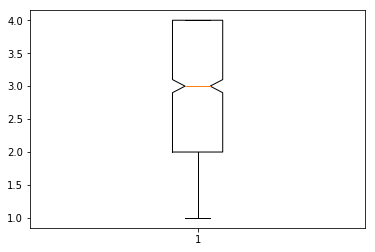

In [37]:
matplotlib.pyplot.boxplot(credit_card_data['Duration in Current address'], notch=True)

## Current address has not real value to me all the since all have the similar creditability which is the same probability fo Creditiability

## Most Valuable Available asset

Text(0,0.5,'rate')

Text(0.5,1,'Most valuable available asset and Creditability')

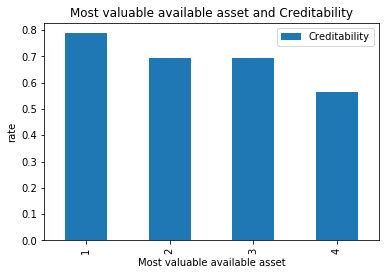

Creditability    0.684726
dtype: float64


The number of cutomers in each Most valuable available asset group


,Most valuable available asset
Most valuable available asset,
1,282
2,232
3,332
4,154




                                Creditability
Most valuable available asset               
1                                   0.787234
2                                   0.693966
3                                   0.692771
4                                   0.564935


In [60]:
asset_plot = credit_card_data.pivot_table(index='Most valuable available asset', values='Creditability')
asset_plot.plot.bar()
plt.ylabel('rate')
plt.title('Most valuable available asset and Creditability')
plt.show()

asset_plot.mean()

print()
print("The number of cutomers in each Most valuable available asset group")
credit_card_data.groupby(['Most valuable available asset'])[['Most valuable available asset']].count()
print()

asset_grp = credit_card_data.groupby(['Most valuable available asset'])[['Creditability']]
print("\n",asset_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x151e0e0860>],
 'caps': [<matplotlib.lines.Line2D at 0x151e0d3c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x151d91cb70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151e0b5048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x151e0e0588>,
  <matplotlib.lines.Line2D at 0x151e0e0ef0>]}

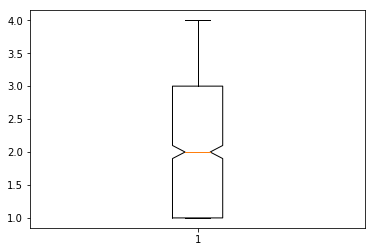

In [39]:
matplotlib.pyplot.boxplot(credit_card_data['Most valuable available asset'], notch=True)

In [61]:
# this shows that there is no outliers and the group 1 (real estate) has the highest crediability rating

# Age need to bin

Text(0,0.5,'rate')

Text(0.5,1,'Age and Creditability')

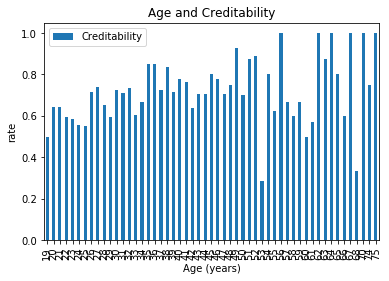

In [40]:
age_plot = credit_card_data.pivot_table(index='Age (years)', values='Creditability')
age_plot.plot.bar()
plt.ylabel('rate')
plt.title('Age and Creditability')
plt.show()
# age_plot.mean()
age_grp = credit_card_data.groupby(['Age (years)'])[['Creditability']]
# print("\n",age_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a15401438>],
 'caps': [<matplotlib.lines.Line2D at 0x1a15401ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a14e0aeb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a14e0a780>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a15401b00>,
  <matplotlib.lines.Line2D at 0x1a154017b8>]}

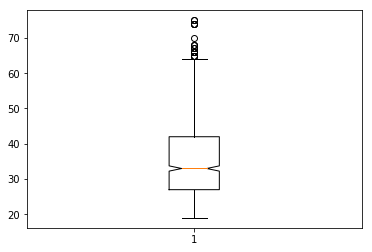

In [62]:
matplotlib.pyplot.boxplot(credit_card_data['Age (years)'], notch=True)
# hence ages after 65 are considered outliers

In [63]:
age_bins = [18,33,47,61,76]
age_grp = pd.cut(credit_card_data['Age (years)'], age_bins,labels=[1,2,3,4])
age_accepted = pd.cut(credit_card_data[credit_card_data['Creditability']==1]['Age (years)'], age_bins, labels=[1,2,3,4])
credit_card_data['Age_grp'] = age_grp
credit_card_data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Credit Duration,Credit Amount Grp,Age_grp
0,1,1,18,4,2,1049,1,2,4,2,...,3,1,1,3,1,1,1,2,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,3,1,2,3,2,1,1,1,2,2
2,1,2,12,2,9,841,2,4,2,2,...,3,1,1,2,1,1,1,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,3,1,2,2,2,1,2,1,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,1,2,2,2,1,1,2,1,1,2


Text(0,0.5,'rate')

Text(0.5,1,'Creditability based on Age')

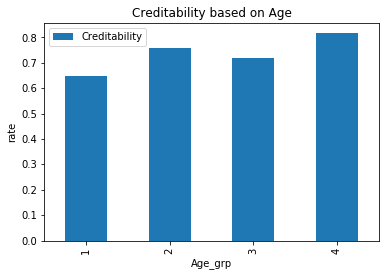

Creditability    0.736004
dtype: float64

In [64]:
age_plot = credit_card_data.pivot_table(index='Age_grp', values="Creditability")
age_plot.plot.bar()
plt.ylabel('rate')
plt.title('Creditability based on Age')
plt.show()


age_plot.mean()



In [65]:
print("The number of cutomers in each Age_grp group")
credit_card_data.groupby(['Age_grp'])[['Age_grp']].count()
print()

age_grpby = credit_card_data.groupby(['Age_grp'])[['Creditability']]
age_grpby.mean()

The number of cutomers in each Age_grp group


,Age_grp
Age_grp,
1,514
2,337
3,111
4,38


,Creditability
Age_grp,
1,0.647860
2,0.759644
3,0.720721
4,0.815789


In [66]:
# while age group of customer greater than 60 have the highest creditability
# it also has the smallest number of customers in that group and majority of themwere outliers

## Concurrent Credits

Text(0,0.5,'rate')

Text(0.5,1,'Concurrent Credits and Creditability')

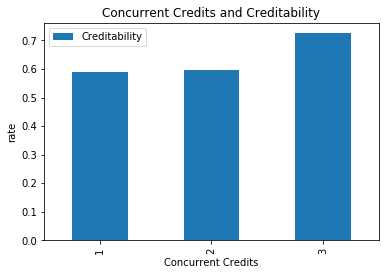

Creditability    0.636829
dtype: float64


The number of cutomers in each Concurrent Credits group


,Concurrent Credits
Concurrent Credits,
1,139
2,47
3,814




                     Creditability
Concurrent Credits               
1                        0.589928
2                        0.595745
3                        0.724816


In [67]:
con_cred_plot = credit_card_data.pivot_table(index='Concurrent Credits', values='Creditability')
con_cred_plot.plot.bar()
plt.ylabel('rate')
plt.title('Concurrent Credits and Creditability')
plt.show()

con_cred_plot.mean()

print()
print("The number of cutomers in each Concurrent Credits group")
credit_card_data.groupby(['Concurrent Credits'])[['Concurrent Credits']].count()
print()

con_cred_grp = credit_card_data.groupby(['Concurrent Credits'])[['Creditability']]
print("\n",con_cred_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x151eaf8080>],
 'caps': [<matplotlib.lines.Line2D at 0x151eaf8a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x151eb00748>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151eb00320>],
 'whiskers': [<matplotlib.lines.Line2D at 0x151eaf81d0>,
  <matplotlib.lines.Line2D at 0x151eaf8668>]}

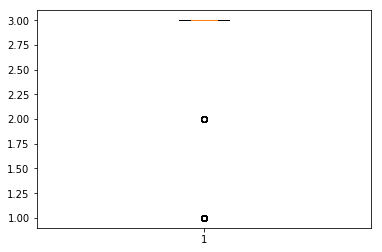

In [46]:
matplotlib.pyplot.boxplot(credit_card_data['Concurrent Credits'], notch=True)

In [68]:
# This shows that there are outliers (customers is group 1(bank) and 2(stores))
# and the higest creditability rate is for group 3  (no concurrent credit installment plan) 

## Type of apartment

Text(0,0.5,'rate')

Text(0.5,1,'Type of apartment and Creditability')

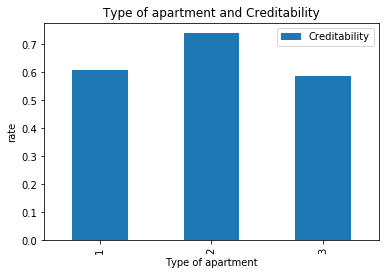

Creditability    0.64574
dtype: float64


The number of cutomers in each Type of apartment group


,Type of apartment
Type of apartment,
1,179
2,714
3,107




                    Creditability
Type of apartment               
1                       0.608939
2                       0.739496
3                       0.588785


In [69]:
apt_plot = credit_card_data.pivot_table(index='Type of apartment', values='Creditability')
apt_plot.plot.bar()
plt.ylabel('rate')
plt.title('Type of apartment and Creditability')
plt.show()

apt_plot.mean()

print()
print("The number of cutomers in each Type of apartment group")
credit_card_data.groupby(['Type of apartment'])[['Type of apartment']].count()
print()

apt_grp = credit_card_data.groupby(['Type of apartment'])[['Creditability']]
print("\n",apt_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x151ec8b160>],
 'caps': [<matplotlib.lines.Line2D at 0x151ec8bb70>,
 'fliers': [<matplotlib.lines.Line2D at 0x151ec92828>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151ec92400>],
 'whiskers': [<matplotlib.lines.Line2D at 0x151ec8b2b0>,
  <matplotlib.lines.Line2D at 0x151ec8b748>]}

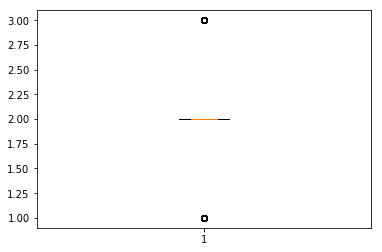

In [48]:
matplotlib.pyplot.boxplot(credit_card_data['Type of apartment'], notch=True)

In [70]:
# outliers are the customers in group 1(rent) and 3(for free) majority of the customers own their home which is 73% creditabilty rating.  

## No of Credits at this Bank

Text(0,0.5,'rate')

Text(0.5,1,'No of Credits at this Bank and Creditability')

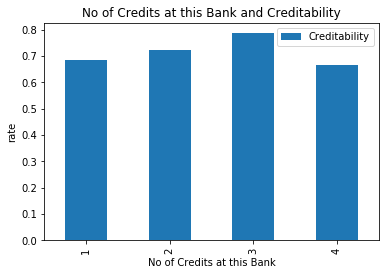

Creditability    0.715037
dtype: float64


The number of cutomers in each No of Credits at this Bank group


,No of Credits at this Bank
No of Credits at this Bank,
1,633
2,333
3,28
4,6




                             Creditability
No of Credits at this Bank               
1                                0.684044
2                                0.723724
3                                0.785714
4                                0.666667


In [71]:
no_cr_bk_plot = credit_card_data.pivot_table(index='No of Credits at this Bank', values='Creditability')
no_cr_bk_plot.plot.bar()
plt.ylabel('rate')
plt.title('No of Credits at this Bank and Creditability')
plt.show()

no_cr_bk_plot.mean()

print()
print("The number of cutomers in each No of Credits at this Bank group")
credit_card_data.groupby(['No of Credits at this Bank'])[['No of Credits at this Bank']].count()
print()

no_cr_bk_grp = credit_card_data.groupby(['No of Credits at this Bank'])[['Creditability']]
print("\n",no_cr_bk_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x151eea00b8>],
 'caps': [<matplotlib.lines.Line2D at 0x151eea0ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x151eeaa780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151eeaa358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x151eea0208>,
  <matplotlib.lines.Line2D at 0x151eea06a0>]}

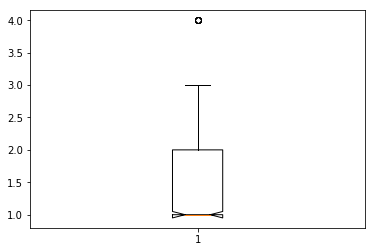

In [50]:
matplotlib.pyplot.boxplot(credit_card_data['No of Credits at this Bank'], notch=True)

In [72]:
# customers that 4 existing credits at the bank are outliers
# and the people with 2 or 3 existing credits have the highest creditabilty rating

## Occupation

Text(0,0.5,'rate')

Text(0.5,1,'Occupation and Creditability')

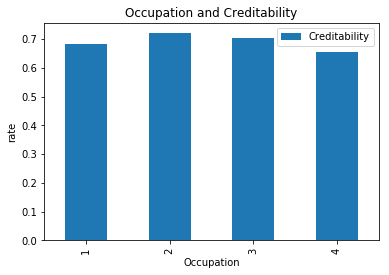

Creditability    0.690496
dtype: float64


The number of cutomers in each Occupation group


,Occupation
Occupation,
1,22
2,200
3,630
4,148




             Creditability
Occupation               
1                0.681818
2                0.720000
3                0.704762
4                0.655405


In [73]:
ocpt_plot = credit_card_data.pivot_table(index='Occupation', values='Creditability')
ocpt_plot.plot.bar()
plt.ylabel('rate')
plt.title('Occupation and Creditability')
plt.show()

ocpt_plot.mean()

print()
print("The number of cutomers in each Occupation group")
credit_card_data.groupby(['Occupation'])[['Occupation']].count()
print()

ocpt_grp = credit_card_data.groupby(['Occupation'])[['Creditability']]
print("\n",ocpt_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x151e7382b0>],
 'caps': [<matplotlib.lines.Line2D at 0x151dc242b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x151dc55e80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151dc550f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x151e7380b8>,
  <matplotlib.lines.Line2D at 0x151e738f98>]}

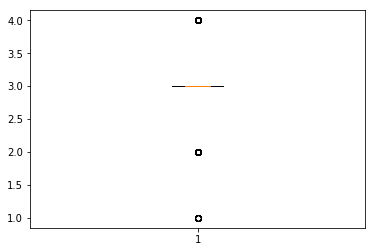

In [52]:
matplotlib.pyplot.boxplot(credit_card_data['Occupation'], notch=True)

In [ ]:
# outliers exist at every occupation group category that is not 3(skilled employees)
# and skilled employes has almost the exact sam creditabilty rating as the mean of creditability

## No of dependents

Text(0,0.5,'rate')

Text(0.5,1,'No of dependents and Creditability')

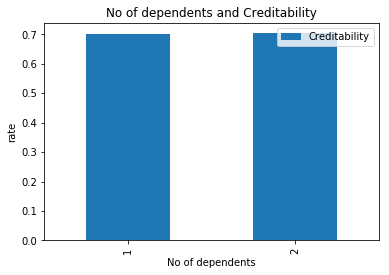

Creditability    0.701317
dtype: float64



                   Creditability
No of dependents               
1                      0.699408
2                      0.703226


In [53]:
dependents_plot = credit_card_data.pivot_table(index='No of dependents', values='Creditability')
dependents_plot.plot.bar()
plt.ylabel('rate')
plt.title('No of dependents and Creditability')
plt.show()

dependents_plot.mean()

print()
dependents_grp = credit_card_data.groupby(['No of dependents'])[['Creditability']]
print("\n",dependents_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x151d7d5e10>],
 'caps': [<matplotlib.lines.Line2D at 0x151e4e2fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x151e856278>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151e856518>],
 'whiskers': [<matplotlib.lines.Line2D at 0x151e4e2b70>,
  <matplotlib.lines.Line2D at 0x151e4e2710>]}

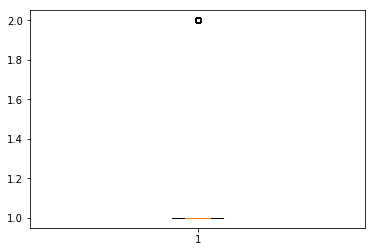

In [54]:
matplotlib.pyplot.boxplot(credit_card_data['No of dependents'], notch=True)

customers with 2 dependents are outliers
# Number of Dependents have no effect of creditability. Same valuabilty as creditability. and number of dependents have the same rate.

## Telephone

Text(0,0.5,'rate')

Text(0.5,1,'Telephone and Creditability')

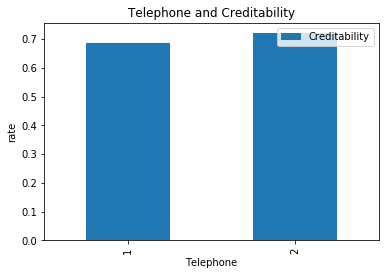

Creditability    0.703269
dtype: float64


The number of cutomers in each Telephone group


,Telephone
Telephone,
1,596
2,404




            Creditability
Telephone               
1               0.686242
2               0.720297


In [74]:
phone_plot = credit_card_data.pivot_table(index='Telephone', values='Creditability')
phone_plot.plot.bar()
plt.ylabel('rate')
plt.title('Telephone and Creditability')
plt.show()

phone_plot.mean()

print()
print("The number of cutomers in each Telephone group")
credit_card_data.groupby(['Telephone'])[['Telephone']].count()
print()

phone_grp = credit_card_data.groupby(['Telephone'])[['Creditability']]
print("\n",phone_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x151f001f28>],
 'caps': [<matplotlib.lines.Line2D at 0x151f00a978>,
 'fliers': [<matplotlib.lines.Line2D at 0x151f010630>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151f010208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x151f00a0b8>,
  <matplotlib.lines.Line2D at 0x151f00a550>]}

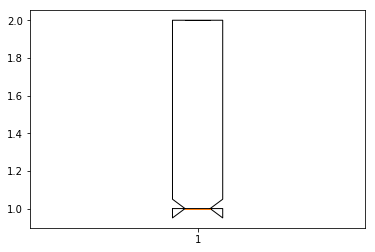

In [56]:
matplotlib.pyplot.boxplot(credit_card_data['Telephone'], notch=True)

# Telephone has the same creditability mean as just creditablilty.
# No variation in the whether the person had a telephone or not

## Foreign Worker

Text(0,0.5,'rate')

Text(0.5,1,'Foreign Worker and Creditability')

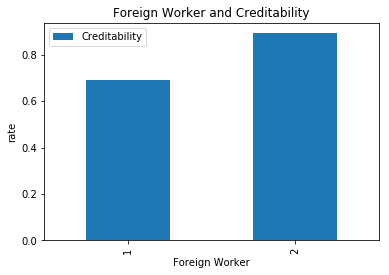

Creditability    0.79226
dtype: float64


The number of cutomers in each Foreign Worker group


,Foreign Worker
Foreign Worker,
1,963
2,37




                 Creditability
Foreign Worker               
1                    0.692627
2                    0.891892


In [75]:
foreign_worker_plot = credit_card_data.pivot_table(index='Foreign Worker', values='Creditability')
foreign_worker_plot.plot.bar()
plt.ylabel('rate')
plt.title('Foreign Worker and Creditability')
plt.show()

foreign_worker_plot.mean()

print()
print("The number of cutomers in each Foreign Worker group")
credit_card_data.groupby(['Foreign Worker'])[['Foreign Worker']].count()
print()

foreign_worker_grp = credit_card_data.groupby(['Foreign Worker'])[['Creditability']]
print("\n",foreign_worker_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x151f22a6a0>],
 'caps': [<matplotlib.lines.Line2D at 0x151f2310f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x151f231d68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151f231940>],
 'whiskers': [<matplotlib.lines.Line2D at 0x151f22a7f0>,
  <matplotlib.lines.Line2D at 0x151f22ac88>]}

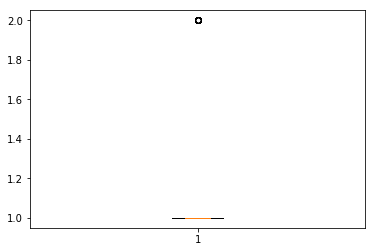

In [58]:
matplotlib.pyplot.boxplot(credit_card_data['Foreign Worker'], notch=True)

In [ ]:
# Customers that are not foreign worke is the minority of the dataset and is any outlier

## Deleting cells

In [59]:
#Deleting Cabin and ticket column
credit_card_data.drop(['Duration in Current address','No of dependents','Telephone'], axis=1, inplace=True)

In [60]:
credit_card_data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,Foreign Worker,Credit Duration,Credit Amount Grp,Age_grp
0,1,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,1,2,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,2
2,1,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,1,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,2,1,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,2,1,1,2


In [61]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    1000 non-null int64
No of Credits at this Bank           10

# Determining what attributes are the most important and are the least dependent on each other.

In [70]:
credit_card_data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,Foreign Worker,Credit Duration,Credit Amount Grp,Age_grp
0,1,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,1,2,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,2
2,1,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,1,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,2,1,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,2,1,1,2


In [71]:
credit_card_data.corr()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,Foreign Worker
Creditability,1.000000,0.350847,-0.214927,0.228785,-0.017979,-0.154740,0.178943,0.116002,-0.072404,0.088184,0.025137,-0.142612,0.091272,0.109844,0.018119,0.045732,-0.032735,0.082079
Account Balance,0.350847,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,-0.127737,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,-0.035187
Duration of Credit (month),-0.214927,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,-0.024490,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,-0.134680
Payment Status of Previous Credit,0.228785,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,-0.040676,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,0.028554
Purpose,-0.017979,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,-0.017607,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,-0.113244
Credit Amount,-0.154740,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,-0.027831,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,-0.030662
Value Savings/Stocks,0.178943,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,-0.105069,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,0.010450
Length of current employment,0.116002,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,-0.008116,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,-0.022845
Instalment per cent,-0.072404,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,-0.011398,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,-0.094762
Sex & Marital Status,0.088184,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,0.050634,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,0.073103


In [72]:
print(credit_card_data[["Creditability", 'Age_grp']].corr())

               Creditability
Creditability            1.0


## Understanding the correlations
As shown above the Account Balance has the highest correlation with the Credibility with 0.35 and type of apartment has the least correlation with Credibility of 0.018<br><br>
looking at the attribute correlation is credit Amt and Duration have the highest correlation among the attributes. when designing the regression models it is important to have the independent variable not highly correlated with each other hence we will only be using one of


## From the heat map and the correlation chart there is very little correlation against creditability. the highest is .35 correlation  with Account Balance and creditabilty and the least correlated is purpose with -0.017

we deleted Telephone and Dependency. will there is very little correlation between any of the columns and Creditbilty these columns have very little variation between the values found within the columns

In [78]:
from sklearn import tree

# Baseline model first
training one model on the training set using the entire feature set adn evaluating its performance

In [92]:
X = credit_card_data[["Account Balance","Payment Status of Previous Credit","Purpose","Value Savings/Stocks",
                     "Length of current employment", "Instalment per cent", "Sex & Marital Status",
                     "Guarantors", "Most valuable available asset", "Concurrent Credits", "Type of apartment",
                     "No of Credits at this Bank", "Occupation", "Foreign Worker",
                     "Credit Duration", "Credit Amount Grp", "Age_grp"]]
Y = credit_card_data['Creditability']

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [94]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [95]:
print(Y_test.count())
Y_test

200


993    0
859    0
298    1
553    1
672    1
971    0
27     1
231    1
306    1
706    1
496    1
558    1
784    0
239    1
578    0
55     1
906    0
175    1
14     1
77     1
31     1
481    1
310    1
311    1
883    0
788    0
45     0
103    1
760    0
1      1
      ..
945    0
795    0
145    1
826    0
492    1
751    0
240    1
648    1
886    0
144    1
767    0
999    0
467    1
315    1
989    0
922    0
717    0
458    1
773    0
204    1
834    0
832    0
435    1
5      1
769    0
679    1
722    1
215    1
653    1
150    1
Name: Creditability, Length: 200, dtype: int64

In [96]:
predicted = clf.predict(X_test)
predicted

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1])

In [97]:
pred_correct = np.sum(Y_test  == predicted)

In [98]:
pred_correct/Y_test.count()

0.705

so out if 200 test values whne using all attrubitutes and the random sampl = 0 
you have roughly 69% accuarcy. which is the almost the same probability that the creditibiliy is given

In [136]:
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn import model_selection


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [137]:
scoring = 'accuracy'
#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
cv_results = model_selection.cross_val_score(GaussianNB(), X_train, Y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', cv_results.mean(), cv_results.std())
print(msg)

NB accuracy: 0.743750 (0.052515)


# Decision tree with PCA

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [131]:
from sklearn.decomposition import PCA
pca=PCA(.85)

In [132]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [133]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [123]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [124]:
predicted = clf.predict(X_test)

In [125]:
predicted

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0])

In [126]:
clf.score(X_test,Y_test)

0.67